https://medium.com/analytics-vidhya/how-to-load-any-image-dataset-in-python-3bd2fa2cb43d

Data From

https://github.com/kaa/coins-dataset

In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

Create Train and Test Data

explanation: https://machinelearningmastery.com/how-to-load-large-datasets-from-directories-for-deep-learning-with-keras/

?Größe von Train und Test Data nachfragen?

In [2]:
datagen=ImageDataGenerator()

train_data=datagen.flow_from_directory('small data set/classified/train',target_size=(150,150),class_mode="categorical", batch_size=1291)
test_data=datagen.flow_from_directory('small data set/classified/test',target_size=(150,150),class_mode="categorical", batch_size=250)
train_images, train_labels = train_data.next()
test_images, test_labels = test_data.next()

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

print(train_images)

Found 1291 images belonging to 8 classes.
Found 1539 images belonging to 8 classes.
(1291, 150, 150, 3)
(1291, 8)
(250, 150, 150, 3)
(250, 8)
[[[[119. 104.  85.]
   [178. 169. 154.]
   [164. 160. 157.]
   ...
   [225. 224. 219.]
   [226. 225. 220.]
   [222. 221. 216.]]

  [[ 94.  79.  60.]
   [163. 154. 139.]
   [159. 155. 152.]
   ...
   [230. 229. 224.]
   [229. 228. 223.]
   [219. 218. 213.]]

  [[ 93.  80.  63.]
   [148. 138. 126.]
   [167. 164. 159.]
   ...
   [222. 221. 216.]
   [225. 224. 219.]
   [222. 221. 216.]]

  ...

  [[222. 223. 218.]
   [229. 230. 225.]
   [220. 220. 220.]
   ...
   [191. 191. 193.]
   [184. 184. 186.]
   [177. 177. 177.]]

  [[227. 228. 223.]
   [223. 224. 219.]
   [220. 220. 220.]
   ...
   [181. 180. 185.]
   [162. 161. 166.]
   [166. 166. 168.]]

  [[226. 227. 222.]
   [221. 222. 217.]
   [221. 221. 221.]
   ...
   [171. 170. 176.]
   [172. 171. 176.]
   [155. 154. 159.]]]


 [[[206. 194. 178.]
   [208. 196. 180.]
   [210. 198. 182.]
   ...
   [210.

In [ ]:
#train_images = train_images / 255
#test_images = test_images / 255
#
#print(train_images)

In [3]:
train_labels_shaped = np.array([])
for i in train_labels:
    i = np.where(i == 1)
    train_labels_shaped = np.append([train_labels_shaped],[i])

test_labels_shaped = np.array([])
for i in test_labels:
    i = np.where(i == 1)
    test_labels_shaped = np.append([test_labels_shaped],[i])

train_labels_shaped = train_labels_shaped.astype("uint8")
test_labels_shaped = test_labels_shaped.astype("uint8")

print(train_labels.shape)
print(test_labels.shape)
print(train_labels_shaped.shape)
print(test_labels_shaped.shape)

(1291, 8)
(250, 8)
(1291,)
(250,)


Welchen Shape sollten Modelle haben

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


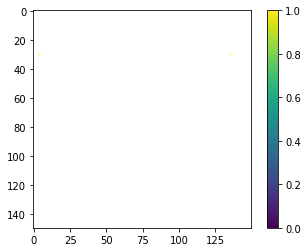

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Modelbuilding

Easy Model

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(150, 150, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(8, activation = 'softmax')
])

Complex Model (s. chapter08.1)

In [ ]:
## provide  (image_height, image_width, image_channels)
#inputs = keras.Input(shape=(150, 150, 3))
#
## use 32 filters, height and width of the 2D convolution window: use 3x3 as integer 3
#x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
#
## extracting 2x2 windows from the input feature maps
#x = layers.MaxPooling2D(pool_size=2)(x)
#
## use 64 filters with 3x3 window
#x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
#
## use 2x2
#x = layers.MaxPooling2D(pool_size=2)(x)
#
## use 128 filters
#x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
#
## flatten the layers
#x = layers.Flatten()(x)
#
## use softmax activation
#outputs = layers.Dense(8, activation="softmax")(x)
#
## define inputs and outputs
#model = keras.Model(inputs=inputs, outputs=outputs)


In [6]:
# use rmsprop
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

Je nach Loss funktion unterschiedliche Shapes der Labels benötigt. Wieso und was ist am sinnvollsten

Model training

In [7]:
model.fit(train_images,train_labels,epochs=5,validation_data = (test_images,test_labels), batch_size=64)

Epoch 1/5
21/21 [==============================] - 2s 53ms/step - loss: 9667.1133 - accuracy: 0.2138 - val_loss: 1873.1576 - val_accuracy: 0.2680
Epoch 2/5
21/21 [==============================] - 1s 46ms/step - loss: 1604.7672 - accuracy: 0.4524 - val_loss: 1268.1437 - val_accuracy: 0.3520
Epoch 3/5
21/21 [==============================] - 1s 48ms/step - loss: 449.2387 - accuracy: 0.5593 - val_loss: 483.9841 - val_accuracy: 0.3680
Epoch 4/5
21/21 [==============================] - 1s 47ms/step - loss: 344.6037 - accuracy: 0.6251 - val_loss: 622.9442 - val_accuracy: 0.3800
Epoch 5/5
21/21 [==============================] - 1s 42ms/step - loss: 322.4817 - accuracy: 0.5809 - val_loss: 829.1642 - val_accuracy: 0.3560
